# Visualizing the 2D PKDO Basis

In [1]:
#clear
# %matplotlib qt4

In [2]:
import numpy as np
from pytools import generate_nonnegative_integer_tuples_summing_to_at_most \
        as gnitstam
import matplotlib.pyplot as pt
from matplotlib import cm

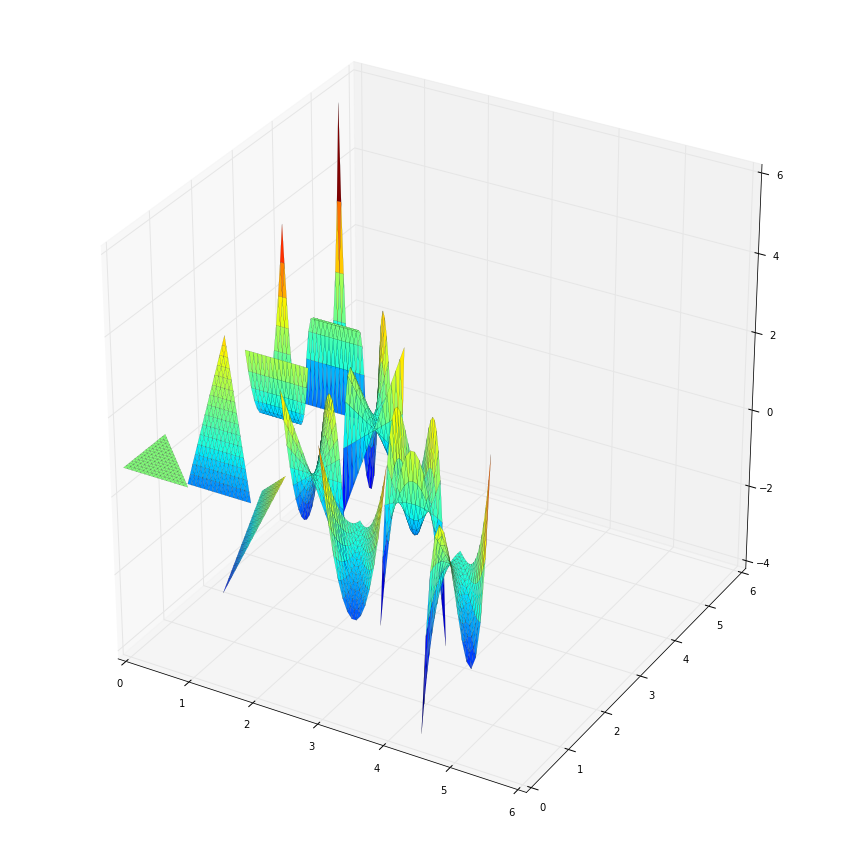

In [3]:

# prepare plot and eval nodes on triangle
dims = 2
node_n = 15
node_tuples = list(gnitstam(node_n, dims))
plot_nodes = np.array(node_tuples, dtype=np.float64) / node_n
eval_nodes = 2*(plot_nodes - 0.5).T

# get triangle submesh
from modepy.tools import submesh
tri_subtriangles = np.array(submesh(node_tuples))

# evaluate each basis function, build global tri mesh
node_count = 0
all_nodes = []
all_triangles = []
all_values = []

from modepy.modes import simplex_onb

p = 3
stretch_factor = 1.5

for (i, j), basis_func in zip(
        gnitstam(p, dims),
        simplex_onb(dims, p),
        ):

    all_nodes.append(plot_nodes + [stretch_factor*i, stretch_factor*j])
    all_triangles.append(tri_subtriangles + node_count)
    all_values.append(basis_func(eval_nodes))
    node_count += len(plot_nodes)

all_nodes = np.vstack(all_nodes)
all_triangles = np.vstack(all_triangles)
all_values = np.hstack(all_values)


from mpl_toolkits.mplot3d import Axes3D
fig = pt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(
        all_nodes[:, 0],
        all_nodes[:, 1],        
        all_triangles,
        all_values, cmap=cm.jet, lw=0.1)

pt.show()